In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
# import holoviews as hv
# from holoviews.operation.datashader import datashade
# from holoviews import opts
# hv.extension('bokeh')


In [3]:
DATA_ROOT='/home/walml/repos/agnfinder/data'

In [4]:
!ls {DATA_ROOT}

cpz_maggie_kdes.pickle			photometry_quicksave.parquet
cpz_paper_sample_week3_maggies.parquet	quasar_template_interpolated.dill
cpz_paper_sample_week3.parquet		quasar_template_shang.txt
cubes					selected_torus_template.csv
error_estimators.pickle			smc_extinction_prevot_1984.dat
interpolated_smc_extinction.dill	torus_model_with_inclination.dill
lfi_test_case.json			torus_template_interpolated.dill


# Visualise Observed Galaxies

In [5]:
parquet_loc = os.path.join(DATA_ROOT, 'cpz_paper_sample_week3.parquet')

In [6]:
# save to parquet for quick reading, including of specific columns
if not os.path.isfile(parquet_loc):
    df = Table.read(os.path.join(DATA_ROOT, 'uK_IR_week3.fits')).to_pandas()
    df.replace(-99, np.nan, inplace=True)
    df.to_parquet(parquet_loc)

In [7]:
metadata_cols = ['id', 'alpha', 'delta', 'redshift', 'hclass', 'hquality',
       'survey_quality', 'survey_comment', 'sp_survey']

In [8]:
case_cols = ['CASE_I_a0_01', 'CASE_I_a0_001', 'CASE_I_a0', 'CASE_II_a0_05',
       'CASE_II_a0_01', 'CASE_II_a0_001', 'CASE_II_a0', 'CASE_II_b0_05',
       'CASE_II_b0_01', 'CASE_II_b0_001', 'CASE_II_b0', 'CASE_III_a0_05',
       'CASE_III_a0_01', 'CASE_III_a0_001', 'CASE_III_a0',
       'CASE_III_b0_05', 'CASE_III_b0_01', 'CASE_III_b0_001',
       'CASE_III_b0', 'CASE_III_c0_05', 'CASE_III_c0_01',
       'CASE_III_c0_001', 'CASE_III_c0', 'CASE_III_d0_05',
       'CASE_III_d0_01', 'CASE_III_d0_001', 'CASE_III_d0']

In [9]:
unified_cols = ['fuv', 'nuv',
       'u', 'g', 'r', 'i', 'z', 'y', 'j', 'h', 'k', 'w1', 'w2', 'w3',
       'w4', 'fuv3', 'nuv3', 'u3', 'g3', 'r3', 'i3', 'z3', 'y3', 'j3',
       'h3', 'k3', 'fuv_err', 'nuv_err', 'u_err', 'g_err', 'r_err',
       'i_err', 'z_err', 'y_err', 'j_err', 'h_err', 'k_err', 'w1_err',
       'w2_err', 'w3_err', 'w4_err', 'fuv3_err', 'nuv3_err', 'u3_err',
       'g3_err', 'r3_err', 'i3_err', 'z3_err', 'y3_err', 'j3_err',
       'h3_err', 'k3_err', 'u_hlr', 'g_hlr', 'r_hlr', 'i_hlr', 'z_hlr',
       'y_hlr', 'j_hlr', 'h_hlr', 'k_hlr']  # what is hlr?

In [10]:
sdss_cols = ['id_sdss_u_dr12',
       'tile_name_sdss_u_dr12', 'alpha_sdss_u_dr12', 'delta_sdss_u_dr12',
       'flags_sdss_u_dr12', 'flux_radius_sdss_u_dr12', 'fwhm_sdss_u_dr12',
       'mag_auto_sdss_u_dr12', 'magerr_auto_sdss_u_dr12',
       'mag_aper2_sdss_u_dr12', 'magerr_aper2_sdss_u_dr12',
       'mag_aper3_sdss_u_dr12', 'magerr_aper3_sdss_u_dr12',
       'id_sdss_g_dr12', 'tile_name_sdss_g_dr12', 'alpha_sdss_g_dr12',
       'delta_sdss_g_dr12', 'flags_sdss_g_dr12',
       'flux_radius_sdss_g_dr12', 'fwhm_sdss_g_dr12',
       'mag_auto_sdss_g_dr12', 'magerr_auto_sdss_g_dr12',
       'mag_aper2_sdss_g_dr12', 'magerr_aper2_sdss_g_dr12',
       'mag_aper3_sdss_g_dr12', 'magerr_aper3_sdss_g_dr12',
       'id_sdss_r_dr12', 'tile_name_sdss_r_dr12', 'alpha_sdss_r_dr12',
       'delta_sdss_r_dr12', 'flags_sdss_r_dr12',
       'flux_radius_sdss_r_dr12', 'fwhm_sdss_r_dr12',
       'mag_auto_sdss_r_dr12', 'magerr_auto_sdss_r_dr12',
       'mag_aper2_sdss_r_dr12', 'magerr_aper2_sdss_r_dr12',
       'mag_aper3_sdss_r_dr12', 'magerr_aper3_sdss_r_dr12',
       'id_sdss_i_dr12', 'tile_name_sdss_i_dr12', 'alpha_sdss_i_dr12',
       'delta_sdss_i_dr12', 'flags_sdss_i_dr12',
       'flux_radius_sdss_i_dr12', 'fwhm_sdss_i_dr12',
       'mag_auto_sdss_i_dr12', 'magerr_auto_sdss_i_dr12',
       'mag_aper2_sdss_i_dr12', 'magerr_aper2_sdss_i_dr12',
       'mag_aper3_sdss_i_dr12', 'magerr_aper3_sdss_i_dr12',
       'id_sdss_z_dr12', 'tile_name_sdss_z_dr12', 'alpha_sdss_z_dr12',
       'delta_sdss_z_dr12', 'flags_sdss_z_dr12',
       'flux_radius_sdss_z_dr12', 'fwhm_sdss_z_dr12',
       'mag_auto_sdss_z_dr12', 'magerr_auto_sdss_z_dr12',
       'mag_aper2_sdss_z_dr12', 'magerr_aper2_sdss_z_dr12',
       'mag_aper3_sdss_z_dr12', 'magerr_aper3_sdss_z_dr12']

### For convenience, define groups of columns

In [11]:
"""
Schema:
- IDENT: unique id?
- Z_BEST: best matching template from library
- Z_BEST68_{LOW}{HIGH}: solutions for 68% confidence (chi-squared = 1.0) in z likelihood from template
- Z_ML: "Zphot from Median of ML distribution"
- CHI_BEST: lowest chi-squared value from template fit
- MOD_BEST: index of best-fitting template?
- EXTLAW_BEST: index of best extinction law?
- EBV_BEST: Extinction value?
- MAG_ABS: Absolute magnitude (over all bands?) of best-fitting template?
- PDZ_BEST: Integrated template probability between z_best +/- 0.1(1+z)
- SCALE_BEST: "Scaling factor", presumably a free param. to scale the template from normalised form to match the observed mags.
- DIST_MOD_BEST: Distance modulus ('DM') of best-fitting template
Suffix: template library used
"""

template_cols_all_models = [
    'IDENT_ALL_MODELS', 'Z_BEST_ALL_MODELS', 'Z_BEST68_LOW_ALL_MODELS',
       'Z_BEST68_HIGH_ALL_MODELS', 'Z_ML_ALL_MODELS',
       'CHI_BEST_ALL_MODELS', 'MOD_BEST_ALL_MODELS',
       'EXTLAW_BEST_ALL_MODELS', 'EBV_BEST_ALL_MODELS',
       'MAG_ABS_BEST_ALL_MODELS', 'PDZ_BEST_ALL_MODELS',
       'SCALE_BEST_ALL_MODELS', 'DIST_MOD_BEST_ALL_MODELS',
       'NBAND_USED_ALL_MODELS', 'Z_SEC_ALL_MODELS', 'CHI_SEC_ALL_MODELS',
       'MOD_SEC_ALL_MODELS', 'MOD_STAR_ALL_MODELS', 'CHI_STAR_ALL_MODELS',
       'CONTEXT_ALL_MODELS', 'ZSPEC_ALL_MODELS']

template_cols_passive = [
    'IDENT_PASSIVE_pure',
       'Z_BEST_PASSIVE_pure', 'Z_BEST68_LOW_PASSIVE_pure',
       'Z_BEST68_HIGH_PASSIVE_pure', 'Z_ML_PASSIVE_pure',
       'CHI_BEST_PASSIVE_pure', 'MOD_BEST_PASSIVE_pure',
       'EXTLAW_BEST_PASSIVE_pure', 'EBV_BEST_PASSIVE_pure',
       'MAG_ABS_BEST_PASSIVE_pure', 'PDZ_BEST_PASSIVE_pure',
       'SCALE_BEST_PASSIVE_pure', 'DIST_MOD_BEST_PASSIVE_pure',
       'NBAND_USED_PASSIVE_pure', 'Z_SEC_PASSIVE_pure',
       'CHI_SEC_PASSIVE_pure', 'MOD_SEC_PASSIVE_pure',
       'MOD_STAR_PASSIVE_pure', 'CHI_STAR_PASSIVE_pure',
       'CONTEXT_PASSIVE_pure', 'ZSPEC_PASSIVE_pure']

template_cols_starforming = [
       'IDENT_STARFORMING_pure', 'Z_BEST_STARFORMING_pure',
       'Z_BEST68_LOW_STARFORMING_pure', 'Z_BEST68_HIGH_STARFORMING_pure',
       'Z_ML_STARFORMING_pure', 'CHI_BEST_STARFORMING_pure',
       'MOD_BEST_STARFORMING_pure', 'EXTLAW_BEST_STARFORMING_pure',
       'EBV_BEST_STARFORMING_pure', 'MAG_ABS_BEST_STARFORMING_pure',
       'PDZ_BEST_STARFORMING_pure', 'SCALE_BEST_STARFORMING_pure',
       'DIST_MOD_BEST_STARFORMING_pure', 'NBAND_USED_STARFORMING_pure',
       'Z_SEC_STARFORMING_pure', 'CHI_SEC_STARFORMING_pure',
       'MOD_SEC_STARFORMING_pure', 'MOD_STAR_STARFORMING_pure',
       'CHI_STAR_STARFORMING_pure', 'CONTEXT_STARFORMING_pure',
       'ZSPEC_STARFORMING_pure']

template_cols_extreme_starforming = [
    'IDENT_EXTREME_STARFORMING_pure',
       'Z_BEST_EXTREME_STARFORMING_pure',
       'Z_BEST68_LOW_EXTREME_STARFORMING_pure',
       'Z_BEST68_HIGH_EXTREME_STARFORMING_pure',
       'Z_ML_EXTREME_STARFORMING_pure',
       'CHI_BEST_EXTREME_STARFORMING_pure',
       'MOD_BEST_EXTREME_STARFORMING_pure',
       'EXTLAW_BEST_EXTREME_STARFORMING_pure',
       'EBV_BEST_EXTREME_STARFORMING_pure',
       'MAG_ABS_BEST_EXTREME_STARFORMING_pure',
       'PDZ_BEST_EXTREME_STARFORMING_pure',
       'SCALE_BEST_EXTREME_STARFORMING_pure',
       'DIST_MOD_BEST_EXTREME_STARFORMING_pure',
       'NBAND_USED_EXTREME_STARFORMING_pure',
       'Z_SEC_EXTREME_STARFORMING_pure',
       'CHI_SEC_EXTREME_STARFORMING_pure',
       'MOD_SEC_EXTREME_STARFORMING_pure',
       'MOD_STAR_EXTREME_STARFORMING_pure',
       'CHI_STAR_EXTREME_STARFORMING_pure',
       'CONTEXT_EXTREME_STARFORMING_pure',
       'ZSPEC_EXTREME_STARFORMING_pure']

template_cols_agn = ['IDENT_AGN_pure',
       'Z_BEST_AGN_pure', 'Z_BEST68_LOW_AGN_pure',
       'Z_BEST68_HIGH_AGN_pure', 'Z_ML_AGN_pure', 'CHI_BEST_AGN_pure',
       'MOD_BEST_AGN_pure', 'EXTLAW_BEST_AGN_pure', 'EBV_BEST_AGN_pure',
       'MAG_ABS_BEST_AGN_pure', 'PDZ_BEST_AGN_pure',
       'SCALE_BEST_AGN_pure', 'DIST_MOD_BEST_AGN_pure',
       'NBAND_USED_AGN_pure', 'Z_SEC_AGN_pure', 'CHI_SEC_AGN_pure',
       'MOD_SEC_AGN_pure', 'MOD_STAR_AGN_pure', 'CHI_STAR_AGN_pure',
       'CONTEXT_AGN_pure', 'ZSPEC_AGN_pure']

template_cols_qso_pure = ['IDENT_QSO_pure',
       'Z_BEST_QSO_pure', 'Z_BEST68_LOW_QSO_pure',
       'Z_BEST68_HIGH_QSO_pure', 'Z_ML_QSO_pure', 'CHI_BEST_QSO_pure',
       'MOD_BEST_QSO_pure', 'EXTLAW_BEST_QSO_pure', 'EBV_BEST_QSO_pure',
       'MAG_ABS_BEST_QSO_pure', 'PDZ_BEST_QSO_pure',
       'SCALE_BEST_QSO_pure', 'DIST_MOD_BEST_QSO_pure',
       'NBAND_USED_QSO_pure', 'Z_SEC_QSO_pure', 'CHI_SEC_QSO_pure',
       'MOD_SEC_QSO_pure', 'MOD_STAR_QSO_pure', 'CHI_STAR_QSO_pure',
       'CONTEXT_QSO_pure', 'ZSPEC_QSO_pure']

template_cols_star = ['IDENT_STAR', 'Z_BEST_STAR',
       'Z_BEST68_LOW_STAR', 'Z_BEST68_HIGH_STAR', 'Z_ML_STAR',
       'CHI_BEST_STAR', 'MOD_BEST_STAR', 'EXTLAW_BEST_STAR',
       'EBV_BEST_STAR', 'MAG_ABS_BEST_STAR', 'PDZ_BEST_STAR',
       'SCALE_BEST_STAR', 'DIST_MOD_BEST_STAR', 'NBAND_USED_STAR',
       'Z_SEC_STAR', 'CHI_SEC_STAR', 'MOD_SEC_STAR', 'MOD_STAR_STAR',
       'CHI_STAR_STAR', 'CONTEXT_STAR', 'ZSPEC_STAR']

template_cols_galaxies = ['IDENT_GALAXIES',
       'Z_BEST_GALAXIES', 'Z_BEST68_LOW_GALAXIES',
       'Z_BEST68_HIGH_GALAXIES', 'Z_ML_GALAXIES', 'CHI_BEST_GALAXIES',
       'MOD_BEST_GALAXIES', 'EXTLAW_BEST_GALAXIES', 'EBV_BEST_GALAXIES',
       'MAG_ABS_BEST_GALAXIES', 'PDZ_BEST_GALAXIES',
       'SCALE_BEST_GALAXIES', 'DIST_MOD_BEST_GALAXIES',
       'NBAND_USED_GALAXIES', 'Z_SEC_GALAXIES', 'CHI_SEC_GALAXIES',
       'MOD_SEC_GALAXIES', 'MOD_STAR_GALAXIES', 'CHI_STAR_GALAXIES',
       'CONTEXT_GALAXIES', 'ZSPEC_GALAXIES']

template_cols_agn = ['IDENT_AGN', 'Z_BEST_AGN',
       'Z_BEST68_LOW_AGN', 'Z_BEST68_HIGH_AGN', 'Z_ML_AGN',
       'CHI_BEST_AGN', 'MOD_BEST_AGN', 'EXTLAW_BEST_AGN', 'EBV_BEST_AGN',
       'MAG_ABS_BEST_AGN', 'PDZ_BEST_AGN', 'SCALE_BEST_AGN',
       'DIST_MOD_BEST_AGN', 'NBAND_USED_AGN', 'Z_SEC_AGN', 'CHI_SEC_AGN',
       'MOD_SEC_AGN', 'MOD_STAR_AGN', 'CHI_STAR_AGN', 'CONTEXT_AGN',
       'ZSPEC_AGN']

# what's the difference between these and qso_pure?
template_cols_qso_impure = ['IDENT_QSO', 'Z_BEST_QSO', 'Z_BEST68_LOW_QSO',
       'Z_BEST68_HIGH_QSO', 'Z_ML_QSO', 'CHI_BEST_QSO', 'MOD_BEST_QSO',
       'EXTLAW_BEST_QSO', 'EBV_BEST_QSO', 'MAG_ABS_BEST_QSO',
       'PDZ_BEST_QSO', 'SCALE_BEST_QSO', 'DIST_MOD_BEST_QSO',
       'NBAND_USED_QSO', 'Z_SEC_QSO', 'CHI_SEC_QSO', 'MOD_SEC_QSO',
       'MOD_STAR_QSO', 'CHI_STAR_QSO', 'CONTEXT_QSO', 'ZSPEC_QSO']

# what's the difference betwen these and STARFORMING?
template_cols_starforming_v2 = [
       'IDENT_starforming', 'Z_BEST_starforming',
       'Z_BEST68_LOW_starforming', 'Z_BEST68_HIGH_starforming',
       'Z_ML_starforming', 'CHI_BEST_starforming', 'MOD_BEST_starforming',
       'EXTLAW_BEST_starforming', 'EBV_BEST_starforming',
       'MAG_ABS_BEST_starforming', 'PDZ_BEST_starforming',
       'SCALE_BEST_starforming', 'DIST_MOD_BEST_starforming',
       'NBAND_USED_starforming', 'Z_SEC_starforming',
       'CHI_SEC_starforming', 'MOD_SEC_starforming',
       'MOD_STAR_starforming', 'CHI_STAR_starforming',
       'CONTEXT_starforming', 'ZSPEC_starforming']

z_errors_vs_spectro = ['Dz_ALL_MODELS',
       'Dz_GALAXIES', 'Dz_AGN', 'Dz_QSO', 'Dz_PASSIVE_pure',
       'Dz_STARFORMING_pure', 'Dz_EXTREME_STARFORMING_pure',
       'Dz_starforming', 'Dz_AGN_pure']

In [12]:
# df = pd.read_parquet(parquet_loc, columns=metadata_cols + unified_cols)
df = pd.read_parquet(parquet_loc)

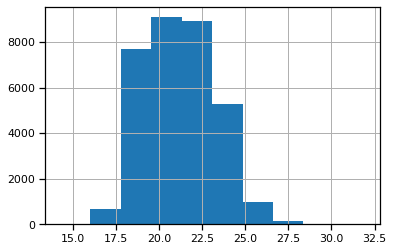

In [13]:
df['mag_auto_sdss_u_dr12'].hist()

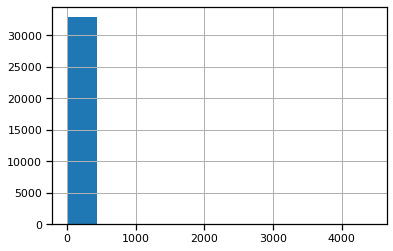

In [14]:
df['magerr_auto_sdss_u_dr12'].hist()

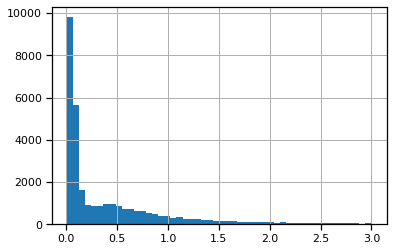

In [15]:
df.query('magerr_auto_sdss_u_dr12 < 3')['magerr_auto_sdss_u_dr12'].hist(bins=50)

(array([18466.,  4384.,  3104.,  1840.,  1119.,   754.,   500.,   403.,
          310.,   157.]),
 array([0.00033325, 0.01293705, 0.02554084, 0.03814464, 0.05074844,
        0.06335224, 0.07595603, 0.08855983, 0.10116363, 0.11376742,
        0.12637122]),
 <a list of 10 Patch objects>)

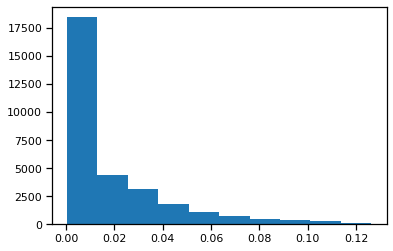

In [16]:
plt.hist(df.query('magerr_auto_sdss_u_dr12 < 3')['magerr_auto_sdss_u_dr12']/df.query('magerr_auto_sdss_u_dr12 < 3')['mag_auto_sdss_u_dr12'])

In [21]:
from agnfinder.prospector import load_photometry
from sedpy import observate

In [25]:
f.mag_col

'mag_auto_viking_y_dr2'

In [32]:
galaxy_n = 500
mags = []
wavelengths = []
filters = load_photometry.get_filters('euclid')
loaded_filters = observate.load_filters([f.bandpass_file for f in filters])
for n, f in enumerate(filters):
    mags.append(df[f.mag_col][galaxy_n])
    wavelengths.append(loaded_filters[n].wave_effective)


In [33]:
mags

[18.8908825779197,
 17.5816493324234,
 16.9120410931125,
 16.5363897670097,
 16.2687249165711,
 16.0908024794513,
 16.321431856044,
 16.4458247233943]

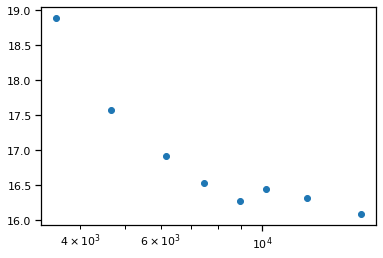

In [34]:
plt.scatter(wavelengths, mags)
plt.xscale('log')

In [20]:

filters = 

In [17]:
maggies = load_photometry.mags_to_maggies(df['mag_auto_sdss_u_dr12'])
plt.hist(np.log10(maggies))

NameError: name 'load_photometry' is not defined

In [ ]:
mag_err = df['magerr_auto_sdss_u_dr12']
maggies_err = load_photometry.calculate_maggie_uncertainty(mag_err, maggies)

In [ ]:
plt.hist(np.log10(maggies_err))

# add maggie cols


In [ ]:
from agnfinder.prospector import load_photometry

In [ ]:
df_with_maggies = load_photometry.add_maggies_cols(df)

In [ ]:
df_with_maggies.to_parquet(os.path.join(DATA_ROOT, 'cpz_paper_sample_week3_maggies.parquet'), index=False)

In [ ]:
filters = load_photometry.get_filters('euclid')

In [ ]:
bands = [f.bandpass_file for f in filters]
bands

In [ ]:
plt.hist(np.log10(df_with_maggies[filters[0].maggie_error_col]))

In [ ]:
relative_errors = df_with_maggies[filters[0].maggie_error_col] / df_with_maggies[filters[0].maggie_col]

In [ ]:
relative_errors[relative_errors < 2].hist(bins=50)

In [ ]:
# df.columns.values

In [ ]:
df['Pr[agn]_case_III'].hist()

In [ ]:
df['Pr[qso]_case_III'].hist()

In [ ]:
df['redshift'].hist(bins=40)

In [ ]:
plt.hist(df['redshift'], bins=40)
plt.yscale('log')
x = np.linspace(0., 5.)
y = 10 ** (4 + x * -.8)  # this is a pretty good fit to the actual observed redshift distribution
plt.plot(x, y)
# hence I can use as a prior for z: 0->1 linear hcube space = 10 ** (4 + x * 5 * -.8) real space
# not super important because I don't actually do inference on z, but hcube should have samples in prop. to real galaxies
# or should it have samples in prop. to deviations??

In [ ]:
_ = plt.hist(df.query('redshift < 1.')['redshift'], bins=40)

Vast majority of galaxies are z < 1, so should make another z < 1 hypercube

In [ ]:
df['hclass'].value_counts()  # need to review what this means

In [ ]:
df['hquality'].value_counts()  # hquality is always 1

In [ ]:
df['sp_survey'].value_counts()  # origin of the spectro. data. Vast majority is SDSS DR12.

In [ ]:
df[unified_cols].describe()

In [ ]:
df = pd.read_parquet(parquet_loc, columns=metadata_cols+z_errors_vs_spectro+template_cols_all_models)

In [ ]:
len(df.query('Z_BEST_ALL_MODELS < 0')) # df has an outlier

In [ ]:
df = df[df['Z_BEST_ALL_MODELS'] > 0]

In [ ]:
plt.scatter(df['Z_BEST_ALL_MODELS'], df['redshift'], marker='x')
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

In [ ]:
plt.hist2d(df['Z_BEST_ALL_MODELS'], df['redshift'], bins=(50, 50))
plt.xlim([0., 2.5])
plt.ylim([0., 2.5])

Those weren't very helpful...let's try something more serious....

In [ ]:
points = datashade(hv.Scatter(df, 'Z_BEST_ALL_MODELS', 'redshift',label="Points")).opts(height=800, width=800, xlim=(0., 2.5), ylim=(0., 2.5))
points

Some interesting artifacts from the 'all models' template fitting configuration:
- many galaxies at all redshifts being placed at z=0.5, especially the highest redshift sources
- some galaxies at all redshifts being placed at z=0
- redshifts below z=1 seem far better than above z=1

In [ ]:
# what does this column mean? If it means the row index of the best-fitting model, how do I work that back to the model itself?
df['MOD_BEST_ALL_MODELS'].value_counts()

In [ ]:
df[template_cols_all_models].iloc[54]

### TODO break down by best-fitting class to see what's going on with the template artifacts above